# Basic functionality

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


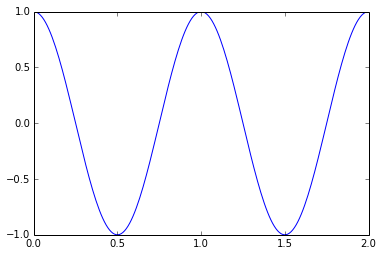

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

import logging
# logging.getLogger('pygrfnn').setLevel(logging.INFO)  # use/change this for development/debuging (use logging.DEBUG for debugging)
logging.getLogger('pygrfnn').setLevel(logging.INFO)

from pygrfnn import Zparam, GrFNN, Model
from pygrfnn.vis import vector_field

sr = 100
dur = 2.0
t = np.linspace(0, dur, sr*dur)
x = np.exp(2j*np.pi*1*t)
# x[np.real(x)<0] = 0

plt.plot(t, np.real(x))

INFO:pygrfnn.grfnn:Created GrFNN with params Zparams: alpha: 0.1, b1: -2+0j, b2: -5+0j, e: 0.9


(-0.5, 1)

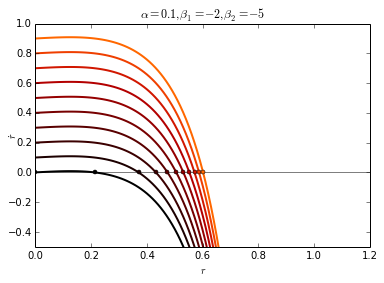

In [9]:
zp = Zparam(0.1, -2, -5, epsilon=0.9)
l = GrFNN(zp,
          frequency_range=(0.5, 8),
          num_oscs=120,
          stimulus_conn_type='linear',
          name='Layer 1',
          z0=0)

vector_field(zp, F=np.arange(0,1,0.1))
plt.ylim(-0.5, 1)

In [10]:
from pygrfnn.network import make_connections


model = Model()
model.add_layer(l, input_channel=0)

C = make_connections(l, l, modes=[1/2, 1, 2])
model.connect_layers(l, # source
                     l, # destination
                     C, # connection matrix
#                      connection_type='allfreq', 
                     connection_type='3freq', 
                     connection_params={'N': 5, 'tol':1e-5, 'lowest_order_only': True},
                     weight=0.25,
                    )

INFO:pygrfnn.network:No mode amplitudes received. Setting all modes to amplitude of 1
INFO:pygrfnn.network:Created connection matrix between 'Layer 1' and 'Layer 1' (120x120)
INFO:pygrfnn.network:Setting up 3-freq coupling between "Layer 1" and "Layer 1", with params N=5, tol = 1e-05 and lowest_order_only = True
INFO:pygrfnn.resonances:a) Elapsed: 0.281126976013 secs
INFO:pygrfnn.resonances:b) Elapsed: 0.296378135681 secs
INFO:pygrfnn.resonances:c) Elapsed: 1.38524913788 secs
INFO:pygrfnn.resonances:d) Elapsed: 1.59527206421 secs
INFO:pygrfnn.resonances:e) Elapsed: 1.76387000084 secs
INFO:pygrfnn.resonances:f) Elapsed: 1.77204918861 secs
INFO:pygrfnn.resonances:g) Elapsed: 1.77648019791 secs
INFO:pygrfnn.network:Found 7 monomials per oscillator (avg)


Connection from Layer 1 (self_connect=False)

INFO:pygrfnn.network:"Layer 1" ready to store TFR


200/200 done!


(<matplotlib.figure.Figure at 0x114784c90>,
 None,
 [<matplotlib.lines.Line2D at 0x11b9c93d0>])

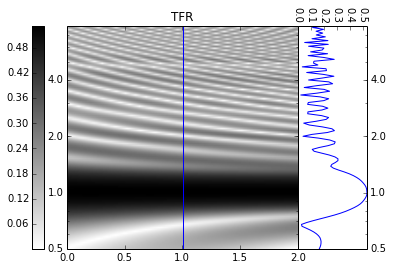

In [12]:
from pygrfnn.vis import tf_detail

model.run(0.5*x, t, 1/sr)
tf_detail(l.Z, t, l.f, t_detail=dur/2, title='TFR')
# tf_detail(l.Z, t, l.f, t_detail=dur/2, title='TFR', display_op=np.angle)